In [1]:
import os
import numpy as np
import pandas as pd
import librosa
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout


In [24]:
# Adjust this path to where your UrbanSound8K metadata CSV is located
METADATA_PATH = 'metadata/UrbanSound8K.csv'

metadata = pd.read_csv(METADATA_PATH)


In [ ]:
# def extract_features(file_path, n_mfcc=13, hop_length=512, n_fft=2048, target_duration=4, sr=22050):
#     try:
#         # Load audio with target sampling rate
#         audio, sample_rate = librosa.load(file_path, sr=sr)
        
#         # Make audio length uniform (pad or trim)
#         max_len = sr * target_duration
#         if len(audio) < max_len:
#             pad_width = max_len - len(audio)
#             audio = np.pad(audio, (0, pad_width), mode='constant')
#         else:
#             audio = audio[:max_len]
        
#         # Extract MFCC features (shape: n_mfcc x frames)
#         mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
#         mfccs = mfccs.T  # Transpose to shape: (frames, n_mfcc)
#         return mfccs
#     except Exception as e:
#         print(f"Error processing {file_path}: {e}")
#         return None


In [ ]:
# Make sure metadata is loaded before this
metadata = pd.read_csv(METADATA_PATH)

# Class labels (from your previous definition)
class_labels = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
                'drilling', 'engine_idling', 'gun_shot', 'jackhammer',
                'siren', 'street_music']

output_dir = r'D:\PROJECT11\mfcc_plots'
os.makedirs(output_dir, exist_ok=True)

for class_id, class_name in enumerate(class_labels):
    # Filter metadata to find the first sample of this class
    class_samples = metadata[metadata['classID'] == class_id]

    if class_samples.empty:
        print(f"No samples found for class: {class_name}")
        continue

    # Take the first sample
    sample_row = class_samples.iloc[0]

    fold = f"fold{sample_row['fold']}"
    file_name = sample_row['slice_file_name']
    file_path = os.path.join(AUDIO_PATH, fold, file_name)

    # Extract MFCC
    mfcc = extract_features(file_path)
    if mfcc is None:
        print(f"Failed to extract features for {file_path}")
        continue

    # Plot MFCC
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc.T, sr=22050, hop_length=512, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'MFCC - {class_name}')
    plt.tight_layout()

    # Save figure
    save_path = os.path.join(output_dir, f'mfcc_{class_name}.png')
    plt.savefig(save_path)
    plt.close()

    print(f"Saved MFCC plot for class '{class_name}' at: {save_path}")


Saved MFCC plot for class 'air_conditioner' at: D:\PROJECT11\mfcc_plots\mfcc_air_conditioner.png
Saved MFCC plot for class 'car_horn' at: D:\PROJECT11\mfcc_plots\mfcc_car_horn.png
Saved MFCC plot for class 'children_playing' at: D:\PROJECT11\mfcc_plots\mfcc_children_playing.png
Saved MFCC plot for class 'dog_bark' at: D:\PROJECT11\mfcc_plots\mfcc_dog_bark.png
Saved MFCC plot for class 'drilling' at: D:\PROJECT11\mfcc_plots\mfcc_drilling.png
Saved MFCC plot for class 'engine_idling' at: D:\PROJECT11\mfcc_plots\mfcc_engine_idling.png
Saved MFCC plot for class 'gun_shot' at: D:\PROJECT11\mfcc_plots\mfcc_gun_shot.png
Saved MFCC plot for class 'jackhammer' at: D:\PROJECT11\mfcc_plots\mfcc_jackhammer.png
Saved MFCC plot for class 'siren' at: D:\PROJECT11\mfcc_plots\mfcc_siren.png
Saved MFCC plot for class 'street_music' at: D:\PROJECT11\mfcc_plots\mfcc_street_music.png


In [4]:
AUDIO_PATH = r'D:\PROJECT11\audio'  # path to 'fold1', ..., 'fold10'

features = []
labels = []

for idx, row in metadata.iterrows():
    fold = f"fold{row['fold']}"  # Add 'fold' prefix here
    file_name = row['slice_file_name']
    file_path = os.path.join(AUDIO_PATH, fold, file_name)
    
    mfccs = extract_features(file_path)
    if mfccs is not None:
        features.append(mfccs)
        labels.append(row['classID'])


In [5]:
max_len = max(f.shape[0] for f in features)
X = np.array([np.pad(f, ((0, max_len - f.shape[0]), (0, 0)), mode='constant') for f in features])
y = np.array(labels)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Print Train and Test Sets
# Print shapes of train and test sets
print("Training set features (X_train) shape:", X_train.shape)
print("Training set labels (y_train) shape:", y_train.shape)
print("Testing set features (X_test) shape:", X_test.shape)
print("Testing set labels (y_test) shape:", y_test.shape)

# Print first few samples from X_train and y_train
print("\nFirst 2 samples of X_train (MFCC features):")
for i in range(min(2, X_train.shape[0])):  # Print up to 2 samples
    print(f"Sample {i}: shape {X_train[i].shape}, first frame: {X_train[i][0]}")
print("\nFirst 2 samples of y_train (labels):", y_train[:2])

# Print first few samples from X_test and y_test
print("\nFirst 2 samples of X_test (MFCC features):")
for i in range(min(2, X_test.shape[0])):  # Print up to 2 samples
    print(f"Sample {i}: shape {X_test[i].shape}, first frame: {X_test[i][0]}")
print("\nFirst 2 samples of y_test (labels):", y_test[:2])

Training set features (X_train) shape: (6985, 173, 13)
Training set labels (y_train) shape: (6985,)
Testing set features (X_test) shape: (1747, 173, 13)
Testing set labels (y_test) shape: (1747,)

First 2 samples of X_train (MFCC features):
Sample 0: shape (173, 13), first frame: [-111.360275   111.03993    -71.827545   -19.348228   -25.674389
    1.4367142   24.942066    14.272572    -7.736783    11.507408
   -8.70535      8.029507     9.083717 ]
Sample 1: shape (173, 13), first frame: [-235.89902    130.23624     -6.354526    18.188925   -19.575737
    8.451723    -7.6744566  -10.283913   -10.709337    -4.387236
  -17.699642   -19.673553   -14.750148 ]

First 2 samples of y_train (labels): [8 9]

First 2 samples of X_test (MFCC features):
Sample 0: shape (173, 13), first frame: [-108.141235   127.46521    -36.225887    13.002128     3.8808196
    6.2512584   -2.073698    12.626108    -0.5543997   15.69194
    4.462819     9.406599    -7.4128838]
Sample 1: shape (173, 13), first frame

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 154s 693ms/step - accuracy: 0.3396 - loss: 1.8316 - val_accuracy: 0.5753 - val_loss: 1.2258
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 152s 694ms/step - accuracy: 0.5551 - loss: 1.2782 - val_accuracy: 0.6600 - val_loss: 1.0610
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 140s 638ms/step - accuracy: 0.6217 - loss: 1.1204 - val_accuracy: 0.6932 - val_loss: 0.9273
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 126s 573ms/step - accuracy: 0.6671 - loss: 0.9676 - val_accuracy: 0.7075 - val_loss: 0.8599
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 126s 574ms/step - accuracy: 0.6960 - loss: 0.9024 - val_accuracy: 0.7373 - val_loss: 0.7992
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 121s 553ms/step - accuracy: 0.7282 - loss: 0.7977 - val_accuracy: 0.7573 - val_loss: 0.7248
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 139s 636ms/step - accuracy: 0.7447 - loss: 0.7366 - val_accuracy: 0.7951 - val_loss: 0.6334
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 144s 658ms/step - accuracy: 0.7814 -

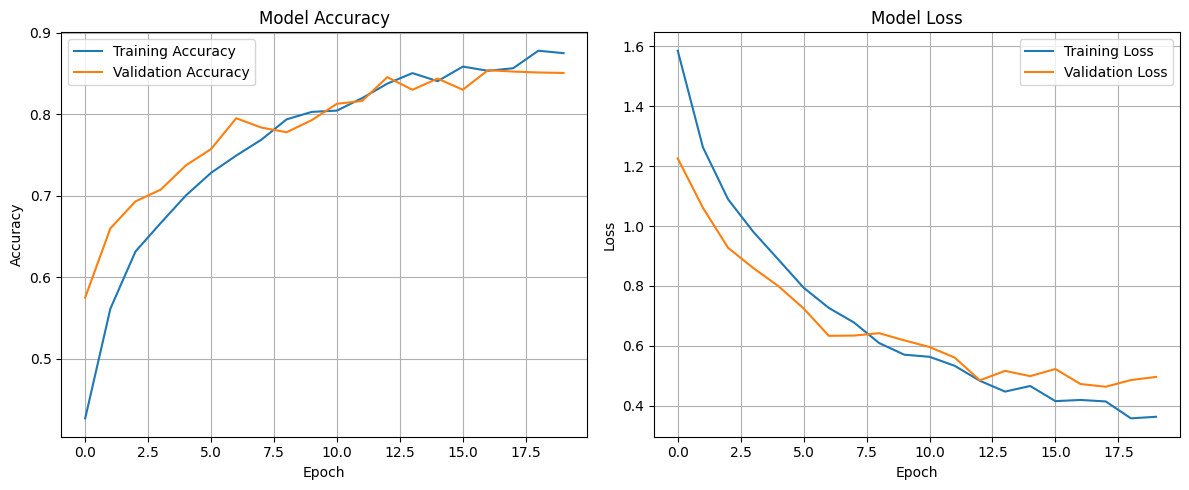

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Define and compile the LSTM model
model_lstm = Sequential([
    LSTM(512, input_shape=(max_len, 13)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])
model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model and store the history
history = model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Save the trained model
model_lstm.save('lstm20.h5')

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('lstm20epoch.png')

In [16]:
test_loss, test_acc = model_lstm.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

#print(f"Final Validation Accuracy: {val_acc * 100:.2f}%")





55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8471 - loss: 0.6039
Test Accuracy: 84.43%


Epoch 1/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.1959 - loss: 2.1896

219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - accuracy: 0.1964 - loss: 2.1881 - val_accuracy: 0.4436 - val_loss: 1.6291 - learning_rate: 0.0010
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.3848 - loss: 1.7117

219/219 ━━━━━━━━━━━━━━━━━━━━ 23s 104ms/step - accuracy: 0.3848 - loss: 1.7116 - val_accuracy: 0.5386 - val_loss: 1.4054 - learning_rate: 0.0010
Epoch 3/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.4277 - loss: 1.5811

219/219 ━━━━━━━━━━━━━━━━━━━━ 18s 84ms/step - accuracy: 0.4279 - loss: 1.5807 - val_accuracy: 0.5879 - val_loss: 1.2852 - learning_rate: 0.0010
Epoch 4/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4913 - loss: 1.4346

219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.4913 - loss: 1.4345 - val_accuracy: 0.6108 - val_loss: 1.2142 - learning_rate: 0.0010
Epoch 5/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5249 - loss: 1.3582

219/219 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.5249 - loss: 1.3582 - val_accuracy: 0.6394 - val_loss: 1.1273 - learning_rate: 0.0010
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.5399 - loss: 1.3126

219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.5399 - loss: 1.3126 - val_accuracy: 0.6422 - val_loss: 1.1169 - learning_rate: 0.0010
Epoch 7/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5740 - loss: 1.2674

219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.5740 - loss: 1.2672 - val_accuracy: 0.6669 - val_loss: 1.0285 - learning_rate: 0.0010
Epoch 8/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.5936 - loss: 1.1823

219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.5936 - loss: 1.1823 - val_accuracy: 0.6737 - val_loss: 1.0035 - learning_rate: 0.0010
Epoch 9/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.6113 - loss: 1.1495

219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 98ms/step - accuracy: 0.6113 - loss: 1.1494 - val_accuracy: 0.6898 - val_loss: 0.9747 - learning_rate: 0.0010
Epoch 10/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.6338 - loss: 1.0844 - val_accuracy: 0.6880 - val_loss: 0.9633 - learning_rate: 0.0010
Epoch 11/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6257 - loss: 1.0926

219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.6257 - loss: 1.0926 - val_accuracy: 0.6932 - val_loss: 0.9472 - learning_rate: 0.0010
Epoch 12/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6292 - loss: 1.0707

219/219 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - accuracy: 0.6292 - loss: 1.0707 - val_accuracy: 0.7029 - val_loss: 0.9186 - learning_rate: 0.0010
Epoch 13/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6239 - loss: 1.0722

219/219 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - accuracy: 0.6240 - loss: 1.0721 - val_accuracy: 0.7149 - val_loss: 0.9020 - learning_rate: 0.0010
Epoch 14/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6628 - loss: 1.0119

219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.6627 - loss: 1.0121 - val_accuracy: 0.7293 - val_loss: 0.8344 - learning_rate: 0.0010
Epoch 15/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6606 - loss: 1.0040

219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - accuracy: 0.6606 - loss: 1.0042 - val_accuracy: 0.7350 - val_loss: 0.8531 - learning_rate: 0.0010
Epoch 16/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6629 - loss: 1.0057

219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.6630 - loss: 1.0056 - val_accuracy: 0.7361 - val_loss: 0.8254 - learning_rate: 0.0010
Epoch 17/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6782 - loss: 0.9544

219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.6783 - loss: 0.9543 - val_accuracy: 0.7373 - val_loss: 0.7944 - learning_rate: 0.0010
Epoch 18/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.6827 - loss: 0.9497

219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - accuracy: 0.6827 - loss: 0.9498 - val_accuracy: 0.7453 - val_loss: 0.7856 - learning_rate: 0.0010
Epoch 19/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6858 - loss: 0.9193

219/219 ━━━━━━━━━━━━━━━━━━━━ 16s 75ms/step - accuracy: 0.6859 - loss: 0.9191 - val_accuracy: 0.7504 - val_loss: 0.7601 - learning_rate: 0.0010
Epoch 20/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.6995 - loss: 0.8970 - val_accuracy: 0.7504 - val_loss: 0.7514 - learning_rate: 0.0010
Epoch 21/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 17s 78ms/step - accuracy: 0.7059 - loss: 0.8848 - val_accuracy: 0.7401 - val_loss: 0.7755 - learning_rate: 0.0010
Epoch 22/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7168 - loss: 0.8491

219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.7168 - loss: 0.8491 - val_accuracy: 0.7630 - val_loss: 0.7338 - learning_rate: 0.0010
Epoch 23/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7227 - loss: 0.8296

219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.7227 - loss: 0.8296 - val_accuracy: 0.7659 - val_loss: 0.6963 - learning_rate: 0.0010
Epoch 24/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - accuracy: 0.7211 - loss: 0.8389 - val_accuracy: 0.7642 - val_loss: 0.6983 - learning_rate: 0.0010
Epoch 25/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7187 - loss: 0.8110

219/219 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - accuracy: 0.7188 - loss: 0.8109 - val_accuracy: 0.7745 - val_loss: 0.6881 - learning_rate: 0.0010
Epoch 26/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.7282 - loss: 0.7820

219/219 ━━━━━━━━━━━━━━━━━━━━ 22s 101ms/step - accuracy: 0.7282 - loss: 0.7821 - val_accuracy: 0.7773 - val_loss: 0.7060 - learning_rate: 0.0010
Epoch 27/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.7379 - loss: 0.7849

219/219 ━━━━━━━━━━━━━━━━━━━━ 16s 74ms/step - accuracy: 0.7379 - loss: 0.7847 - val_accuracy: 0.7819 - val_loss: 0.6612 - learning_rate: 0.0010
Epoch 28/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7508 - loss: 0.7311

219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.7508 - loss: 0.7312 - val_accuracy: 0.7836 - val_loss: 0.6723 - learning_rate: 0.0010
Epoch 29/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 17s 77ms/step - accuracy: 0.7525 - loss: 0.7373 - val_accuracy: 0.7779 - val_loss: 0.6987 - learning_rate: 0.0010
Epoch 30/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.7441 - loss: 0.7545 - val_accuracy: 0.7779 - val_loss: 0.6599 - learning_rate: 0.0010
Epoch 31/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.7470 - loss: 0.7305

219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.7470 - loss: 0.7305 - val_accuracy: 0.7842 - val_loss: 0.6455 - learning_rate: 0.0010
Epoch 32/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 98ms/step - accuracy: 0.7536 - loss: 0.7374 - val_accuracy: 0.7802 - val_loss: 0.6505 - learning_rate: 0.0010
Epoch 33/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.7591 - loss: 0.7163

219/219 ━━━━━━━━━━━━━━━━━━━━ 17s 78ms/step - accuracy: 0.7590 - loss: 0.7164 - val_accuracy: 0.7876 - val_loss: 0.6650 - learning_rate: 0.0010
Epoch 34/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.7517 - loss: 0.7151

219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.7517 - loss: 0.7152 - val_accuracy: 0.7928 - val_loss: 0.6574 - learning_rate: 0.0010
Epoch 35/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - accuracy: 0.7528 - loss: 0.7147 - val_accuracy: 0.7773 - val_loss: 0.6420 - learning_rate: 0.0010
Epoch 36/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.7676 - loss: 0.6777

219/219 ━━━━━━━━━━━━━━━━━━━━ 22s 101ms/step - accuracy: 0.7676 - loss: 0.6777 - val_accuracy: 0.8042 - val_loss: 0.6202 - learning_rate: 0.0010
Epoch 37/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 22s 99ms/step - accuracy: 0.7770 - loss: 0.6653 - val_accuracy: 0.7991 - val_loss: 0.6111 - learning_rate: 0.0010
Epoch 38/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 22s 101ms/step - accuracy: 0.7743 - loss: 0.6783 - val_accuracy: 0.7945 - val_loss: 0.6153 - learning_rate: 0.0010
Epoch 39/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.7758 - loss: 0.6466

219/219 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.7758 - loss: 0.6467 - val_accuracy: 0.8094 - val_loss: 0.5846 - learning_rate: 0.0010
Epoch 40/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7871 - loss: 0.6138

219/219 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - accuracy: 0.7871 - loss: 0.6139 - val_accuracy: 0.8100 - val_loss: 0.6016 - learning_rate: 0.0010
Epoch 41/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 19s 85ms/step - accuracy: 0.7872 - loss: 0.6339 - val_accuracy: 0.8031 - val_loss: 0.6181 - learning_rate: 0.0010
Epoch 42/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.7829 - loss: 0.6404 - val_accuracy: 0.8100 - val_loss: 0.6148 - learning_rate: 0.0010
Epoch 43/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - accuracy: 0.7970 - loss: 0.6042 - val_accuracy: 0.7899 - val_loss: 0.6561 - learning_rate: 0.0010
Epoch 44/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.7842 - loss: 0.6409

219/219 ━━━━━━━━━━━━━━━━━━━━ 22s 101ms/step - accuracy: 0.7842 - loss: 0.6409 - val_accuracy: 0.8197 - val_loss: 0.5904 - learning_rate: 0.0010
Epoch 45/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 22s 102ms/step - accuracy: 0.7947 - loss: 0.6061 - val_accuracy: 0.8168 - val_loss: 0.5708 - learning_rate: 5.0000e-04
Epoch 46/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.8173 - loss: 0.5439

219/219 ━━━━━━━━━━━━━━━━━━━━ 22s 101ms/step - accuracy: 0.8174 - loss: 0.5439 - val_accuracy: 0.8214 - val_loss: 0.5672 - learning_rate: 5.0000e-04
Epoch 47/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8346 - loss: 0.4905

219/219 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - accuracy: 0.8346 - loss: 0.4906 - val_accuracy: 0.8277 - val_loss: 0.5605 - learning_rate: 5.0000e-04
Epoch 48/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.8159 - loss: 0.5164 - val_accuracy: 0.8134 - val_loss: 0.6053 - learning_rate: 5.0000e-04
Epoch 49/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - accuracy: 0.8237 - loss: 0.5090 - val_accuracy: 0.8180 - val_loss: 0.5711 - learning_rate: 5.0000e-04
Epoch 50/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.8344 - loss: 0.4896 - val_accuracy: 0.8151 - val_loss: 0.6072 - learning_rate: 5.0000e-04
Epoch 51/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - accuracy: 0.8332 - loss: 0.4949 - val_accuracy: 0.8260 - val_loss: 0.5788 - learning_rate: 5.0000e-04
Epoch 52/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 19s 89ms/step - accuracy: 0.8268 - loss: 0.4911 - val_accuracy: 0.8266 - val_loss: 0.5654 - learning_rate: 5.0000e-04
Epoch 53/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/ste

219/219 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - accuracy: 0.8382 - loss: 0.4846 - val_accuracy: 0.8369 - val_loss: 0.5358 - learning_rate: 2.5000e-04
Epoch 54/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.8517 - loss: 0.4377 - val_accuracy: 0.8351 - val_loss: 0.5542 - learning_rate: 2.5000e-04
Epoch 55/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8488 - loss: 0.4358

219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.8488 - loss: 0.4358 - val_accuracy: 0.8374 - val_loss: 0.5314 - learning_rate: 2.5000e-04
Epoch 56/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8582 - loss: 0.4118

219/219 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - accuracy: 0.8581 - loss: 0.4119 - val_accuracy: 0.8403 - val_loss: 0.5328 - learning_rate: 2.5000e-04
Epoch 57/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8630 - loss: 0.4123

219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.8629 - loss: 0.4125 - val_accuracy: 0.8443 - val_loss: 0.5373 - learning_rate: 2.5000e-04
Epoch 58/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.8515 - loss: 0.4215 - val_accuracy: 0.8420 - val_loss: 0.5442 - learning_rate: 2.5000e-04
Epoch 59/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.8733 - loss: 0.3963 - val_accuracy: 0.8357 - val_loss: 0.5589 - learning_rate: 2.5000e-04
Epoch 60/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.8432 - loss: 0.4514 - val_accuracy: 0.8254 - val_loss: 0.6166 - learning_rate: 2.5000e-04
Epoch 61/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.8462 - loss: 0.4518 - val_accuracy: 0.8426 - val_loss: 0.5375 - learning_rate: 1.2500e-04
Epoch 62/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.8598 - loss: 0.3902

219/219 ━━━━━━━━━━━━━━━━━━━━ 17s 80ms/step - accuracy: 0.8598 - loss: 0.3902 - val_accuracy: 0.8460 - val_loss: 0.5383 - learning_rate: 1.2500e-04
Epoch 63/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.8619 - loss: 0.4034 - val_accuracy: 0.8414 - val_loss: 0.5422 - learning_rate: 1.2500e-04
Epoch 64/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.8620 - loss: 0.3972

219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.8620 - loss: 0.3972 - val_accuracy: 0.8477 - val_loss: 0.5339 - learning_rate: 1.2500e-04
Epoch 65/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.8590 - loss: 0.3985 - val_accuracy: 0.8460 - val_loss: 0.5344 - learning_rate: 1.2500e-04


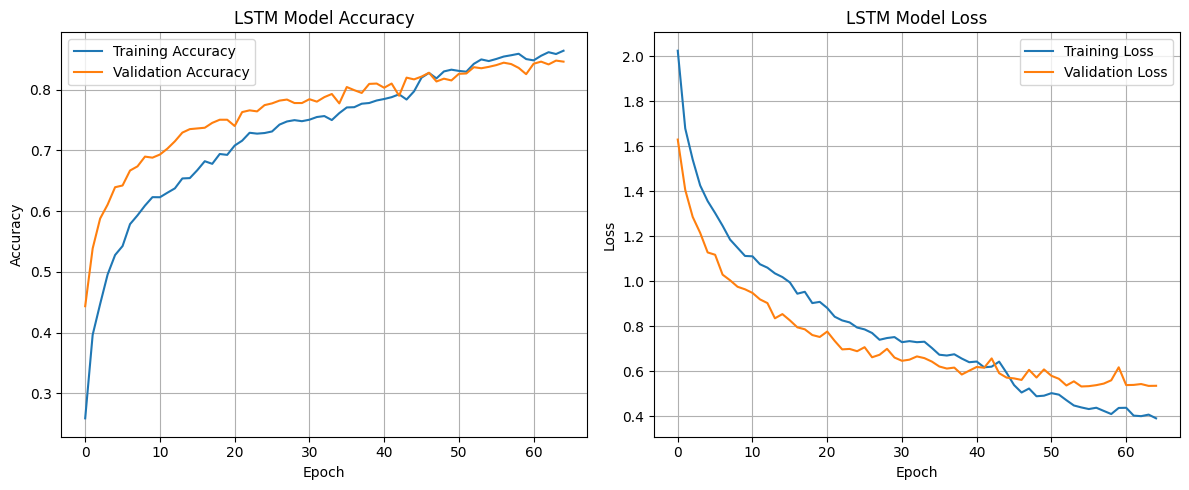

55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step


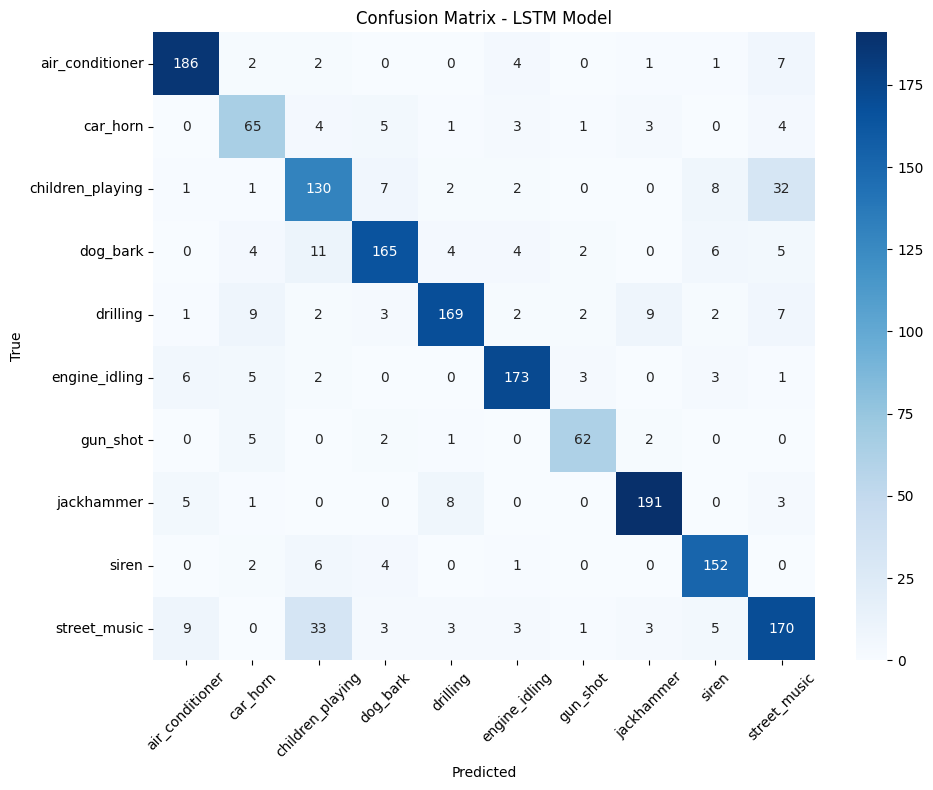


Classification Report:

                  precision    recall  f1-score   support

 air_conditioner       0.89      0.92      0.91       203
        car_horn       0.69      0.76      0.72        86
children_playing       0.68      0.71      0.70       183
        dog_bark       0.87      0.82      0.85       201
        drilling       0.90      0.82      0.86       206
   engine_idling       0.90      0.90      0.90       193
        gun_shot       0.87      0.86      0.87        72
      jackhammer       0.91      0.92      0.92       208
           siren       0.86      0.92      0.89       165
    street_music       0.74      0.74      0.74       230

        accuracy                           0.84      1747
       macro avg       0.83      0.84      0.83      1747
    weighted avg       0.84      0.84      0.84      1747



In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Define the class labels (UrbanSound8K classes)
class_labels = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
                'drilling', 'engine_idling', 'gun_shot', 'jackhammer',
                'siren', 'street_music']

# Automatically determine input shape
max_len = X_train.shape[1]  # e.g., 173 MFCC frames
n_features = X_train.shape[2]  # should be 13 MFCC coefficients

# === Build LSTM Model ===
model_lstm = Sequential([
    Input(shape=(max_len, n_features)),
    LSTM(128, return_sequences=False),  # Use return_sequences=True if stacking more LSTM layers
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model_lstm.compile(loss='sparse_categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

# === Callbacks ===
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('lstm_model100.h5', monitor='val_accuracy', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# === Train Model ===
history = model_lstm.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop, checkpoint, reduce_lr]
)

# === Accuracy & Loss Plots ===
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('lstm_accuracy_loss.png')
plt.show()

# === Evaluation ===
# Load best model (optional)
# from tensorflow.keras.models import load_model
# model_lstm = load_model('lstm_model100.h5')

# Predict on test set
y_pred = model_lstm.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels
y_true = y_test if len(y_test.shape) == 1 else np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - LSTM Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('lstm_confusion_matrix.png')
plt.show()

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))


Epoch 1/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.2320 - loss: 2.1105

219/219 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - accuracy: 0.2329 - loss: 2.1082 - val_accuracy: 0.5278 - val_loss: 1.3658 - learning_rate: 0.0010
Epoch 2/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.4971 - loss: 1.4351

219/219 ━━━━━━━━━━━━━━━━━━━━ 18s 84ms/step - accuracy: 0.4972 - loss: 1.4349 - val_accuracy: 0.6045 - val_loss: 1.1617 - learning_rate: 0.0010
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5432 - loss: 1.3159

219/219 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.5432 - loss: 1.3158 - val_accuracy: 0.6583 - val_loss: 1.0535 - learning_rate: 0.0010
Epoch 4/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5896 - loss: 1.1754

219/219 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.5897 - loss: 1.1754 - val_accuracy: 0.6629 - val_loss: 1.0109 - learning_rate: 0.0010
Epoch 5/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6312 - loss: 1.0910

219/219 ━━━━━━━━━━━━━━━━━━━━ 17s 76ms/step - accuracy: 0.6312 - loss: 1.0911 - val_accuracy: 0.7041 - val_loss: 0.9287 - learning_rate: 0.0010
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.6412 - loss: 1.0542

219/219 ━━━━━━━━━━━━━━━━━━━━ 22s 99ms/step - accuracy: 0.6413 - loss: 1.0541 - val_accuracy: 0.7144 - val_loss: 0.8661 - learning_rate: 0.0010
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - accuracy: 0.6471 - loss: 1.0366 - val_accuracy: 0.7098 - val_loss: 0.8618 - learning_rate: 0.0010
Epoch 8/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6812 - loss: 0.9427

219/219 ━━━━━━━━━━━━━━━━━━━━ 17s 78ms/step - accuracy: 0.6812 - loss: 0.9427 - val_accuracy: 0.7407 - val_loss: 0.7945 - learning_rate: 0.0010
Epoch 9/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.6960 - loss: 0.8910

219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.6959 - loss: 0.8912 - val_accuracy: 0.7527 - val_loss: 0.7659 - learning_rate: 0.0010
Epoch 10/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.7189 - loss: 0.8503

219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.7188 - loss: 0.8505 - val_accuracy: 0.7596 - val_loss: 0.7385 - learning_rate: 0.0010
Epoch 11/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.7150 - loss: 0.8421 - val_accuracy: 0.7556 - val_loss: 0.7198 - learning_rate: 0.0010
Epoch 12/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7201 - loss: 0.8027

219/219 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - accuracy: 0.7201 - loss: 0.8028 - val_accuracy: 0.7779 - val_loss: 0.6969 - learning_rate: 0.0010
Epoch 13/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - accuracy: 0.7313 - loss: 0.7813 - val_accuracy: 0.7779 - val_loss: 0.6724 - learning_rate: 0.0010
Epoch 14/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7443 - loss: 0.7432

219/219 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - accuracy: 0.7443 - loss: 0.7431 - val_accuracy: 0.7945 - val_loss: 0.6343 - learning_rate: 0.0010
Epoch 15/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7435 - loss: 0.7481

219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - accuracy: 0.7435 - loss: 0.7480 - val_accuracy: 0.8082 - val_loss: 0.6254 - learning_rate: 0.0010
Epoch 16/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - accuracy: 0.7680 - loss: 0.6960 - val_accuracy: 0.7985 - val_loss: 0.6193 - learning_rate: 0.0010
Epoch 17/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - accuracy: 0.7688 - loss: 0.6708 - val_accuracy: 0.7922 - val_loss: 0.6401 - learning_rate: 0.0010
Epoch 18/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7548 - loss: 0.6919

219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - accuracy: 0.7549 - loss: 0.6919 - val_accuracy: 0.8140 - val_loss: 0.6071 - learning_rate: 0.0010
Epoch 19/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - accuracy: 0.7698 - loss: 0.6907 - val_accuracy: 0.8042 - val_loss: 0.6031 - learning_rate: 0.0010
Epoch 20/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - accuracy: 0.7813 - loss: 0.6476 - val_accuracy: 0.8054 - val_loss: 0.6058 - learning_rate: 0.0010
Epoch 21/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7886 - loss: 0.6110

219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - accuracy: 0.7886 - loss: 0.6112 - val_accuracy: 0.8157 - val_loss: 0.5833 - learning_rate: 0.0010
Epoch 22/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8019 - loss: 0.5907

219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - accuracy: 0.8019 - loss: 0.5908 - val_accuracy: 0.8185 - val_loss: 0.5680 - learning_rate: 0.0010
Epoch 23/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7962 - loss: 0.5892

219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - accuracy: 0.7963 - loss: 0.5892 - val_accuracy: 0.8226 - val_loss: 0.5633 - learning_rate: 0.0010
Epoch 24/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - accuracy: 0.7970 - loss: 0.5833 - val_accuracy: 0.8208 - val_loss: 0.5554 - learning_rate: 0.0010
Epoch 25/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8125 - loss: 0.5577

219/219 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - accuracy: 0.8124 - loss: 0.5578 - val_accuracy: 0.8266 - val_loss: 0.5520 - learning_rate: 0.0010
Epoch 26/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - accuracy: 0.8078 - loss: 0.5446 - val_accuracy: 0.8134 - val_loss: 0.5668 - learning_rate: 0.0010
Epoch 27/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - accuracy: 0.8218 - loss: 0.5381 - val_accuracy: 0.8191 - val_loss: 0.5651 - learning_rate: 0.0010
Epoch 28/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - accuracy: 0.8068 - loss: 0.5576 - val_accuracy: 0.8174 - val_loss: 0.5645 - learning_rate: 0.0010
Epoch 29/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - accuracy: 0.8212 - loss: 0.5209 - val_accuracy: 0.8168 - val_loss: 0.5515 - learning_rate: 0.0010
Epoch 30/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - accuracy: 0.8187 - loss: 0.5189 - val_accuracy: 0.8237 - val_loss: 0.5520 - learning_rate: 0.0010
Epoch 31/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8212 - l

219/219 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - accuracy: 0.8212 - loss: 0.5180 - val_accuracy: 0.8369 - val_loss: 0.5230 - learning_rate: 0.0010
Epoch 32/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step - accuracy: 0.8320 - loss: 0.4967 - val_accuracy: 0.8323 - val_loss: 0.5424 - learning_rate: 0.0010
Epoch 33/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - accuracy: 0.8361 - loss: 0.4957 - val_accuracy: 0.8363 - val_loss: 0.5381 - learning_rate: 0.0010
Epoch 34/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 16s 75ms/step - accuracy: 0.8399 - loss: 0.4690 - val_accuracy: 0.8254 - val_loss: 0.5769 - learning_rate: 0.0010
Epoch 35/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.8252 - loss: 0.4927 - val_accuracy: 0.8271 - val_loss: 0.5527 - learning_rate: 0.0010
Epoch 36/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.8319 - loss: 0.4726 - val_accuracy: 0.8294 - val_loss: 0.5270 - learning_rate: 0.0010
Epoch 37/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.8539 - l

219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.8539 - loss: 0.4128 - val_accuracy: 0.8443 - val_loss: 0.4985 - learning_rate: 5.0000e-04
Epoch 38/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.8576 - loss: 0.4031 - val_accuracy: 0.8409 - val_loss: 0.5144 - learning_rate: 5.0000e-04
Epoch 39/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.8660 - loss: 0.3761

219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.8660 - loss: 0.3761 - val_accuracy: 0.8512 - val_loss: 0.4938 - learning_rate: 5.0000e-04
Epoch 40/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 22s 101ms/step - accuracy: 0.8717 - loss: 0.3535 - val_accuracy: 0.8472 - val_loss: 0.4867 - learning_rate: 5.0000e-04
Epoch 41/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.8777 - loss: 0.3496

219/219 ━━━━━━━━━━━━━━━━━━━━ 17s 76ms/step - accuracy: 0.8776 - loss: 0.3497 - val_accuracy: 0.8586 - val_loss: 0.4908 - learning_rate: 5.0000e-04
Epoch 42/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 16s 73ms/step - accuracy: 0.8771 - loss: 0.3585 - val_accuracy: 0.8540 - val_loss: 0.4983 - learning_rate: 5.0000e-04
Epoch 43/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8826 - loss: 0.3416

219/219 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - accuracy: 0.8826 - loss: 0.3416 - val_accuracy: 0.8598 - val_loss: 0.4820 - learning_rate: 5.0000e-04
Epoch 44/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.8829 - loss: 0.3291 - val_accuracy: 0.8575 - val_loss: 0.4738 - learning_rate: 5.0000e-04
Epoch 45/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8727 - loss: 0.3543

219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - accuracy: 0.8727 - loss: 0.3543 - val_accuracy: 0.8626 - val_loss: 0.4695 - learning_rate: 5.0000e-04
Epoch 46/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.8838 - loss: 0.3310 - val_accuracy: 0.8586 - val_loss: 0.4907 - learning_rate: 5.0000e-04
Epoch 47/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.8887 - loss: 0.3133 - val_accuracy: 0.8620 - val_loss: 0.4701 - learning_rate: 5.0000e-04
Epoch 48/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - accuracy: 0.8866 - loss: 0.3290 - val_accuracy: 0.8575 - val_loss: 0.4971 - learning_rate: 5.0000e-04
Epoch 49/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8773 - loss: 0.3310

219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - accuracy: 0.8773 - loss: 0.3310 - val_accuracy: 0.8649 - val_loss: 0.4918 - learning_rate: 5.0000e-04
Epoch 50/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step - accuracy: 0.8981 - loss: 0.2833 - val_accuracy: 0.8500 - val_loss: 0.4867 - learning_rate: 5.0000e-04
Epoch 51/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.8900 - loss: 0.3090

219/219 ━━━━━━━━━━━━━━━━━━━━ 17s 80ms/step - accuracy: 0.8900 - loss: 0.3089 - val_accuracy: 0.8661 - val_loss: 0.4691 - learning_rate: 2.5000e-04
Epoch 52/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9073 - loss: 0.2746

219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.9072 - loss: 0.2747 - val_accuracy: 0.8718 - val_loss: 0.4616 - learning_rate: 2.5000e-04
Epoch 53/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.9093 - loss: 0.2586 - val_accuracy: 0.8695 - val_loss: 0.4694 - learning_rate: 2.5000e-04
Epoch 54/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.9082 - loss: 0.2745 - val_accuracy: 0.8678 - val_loss: 0.4716 - learning_rate: 2.5000e-04
Epoch 55/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.8999 - loss: 0.2616 - val_accuracy: 0.8678 - val_loss: 0.4738 - learning_rate: 2.5000e-04
Epoch 56/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.9117 - loss: 0.2570 - val_accuracy: 0.8638 - val_loss: 0.4874 - learning_rate: 2.5000e-04
Epoch 57/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - accuracy: 0.9102 - loss: 0.2608 - val_accuracy: 0.8689 - val_loss: 0.4756 - learning_rate: 2.5000e-04
Epoch 58/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/st

219/219 ━━━━━━━━━━━━━━━━━━━━ 17s 80ms/step - accuracy: 0.9203 - loss: 0.2195 - val_accuracy: 0.8752 - val_loss: 0.4638 - learning_rate: 1.2500e-04
Epoch 60/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 19s 85ms/step - accuracy: 0.9209 - loss: 0.2282 - val_accuracy: 0.8729 - val_loss: 0.4713 - learning_rate: 1.2500e-04
Epoch 61/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.9161 - loss: 0.2269 - val_accuracy: 0.8741 - val_loss: 0.4774 - learning_rate: 1.2500e-04
Epoch 62/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.9069 - loss: 0.2500 - val_accuracy: 0.8752 - val_loss: 0.4733 - learning_rate: 1.2500e-04


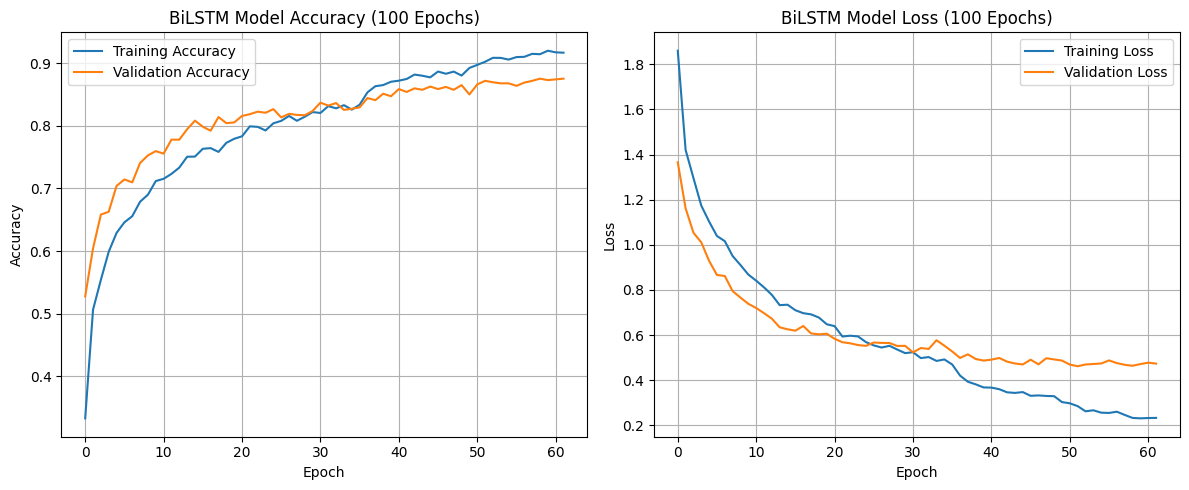

55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step


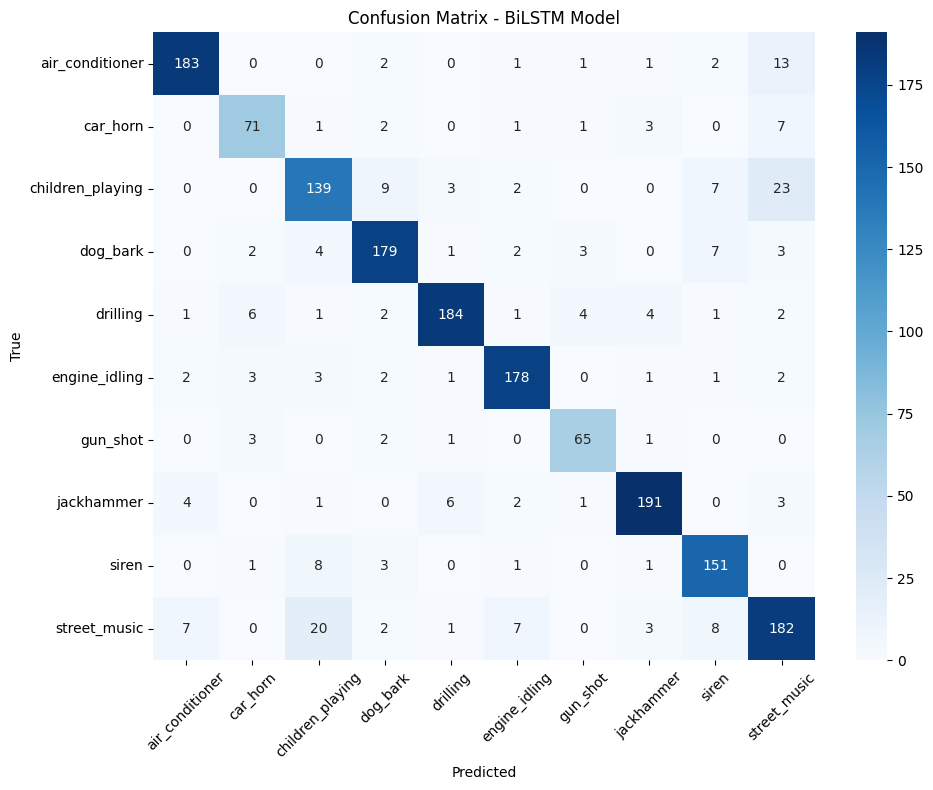


Classification Report:

                  precision    recall  f1-score   support

 air_conditioner       0.93      0.90      0.92       203
        car_horn       0.83      0.83      0.83        86
children_playing       0.79      0.76      0.77       183
        dog_bark       0.88      0.89      0.89       201
        drilling       0.93      0.89      0.91       206
   engine_idling       0.91      0.92      0.92       193
        gun_shot       0.87      0.90      0.88        72
      jackhammer       0.93      0.92      0.92       208
           siren       0.85      0.92      0.88       165
    street_music       0.77      0.79      0.78       230

        accuracy                           0.87      1747
       macro avg       0.87      0.87      0.87      1747
    weighted avg       0.87      0.87      0.87      1747



In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Define the class labels (UrbanSound8K classes)
class_labels = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
                'drilling', 'engine_idling', 'gun_shot', 'jackhammer',
                'siren', 'street_music']

# Automatically determine input shape
max_len = X_train.shape[1]  # e.g., 173 MFCC frames
n_features = X_train.shape[2]  # should be 13 MFCC coefficients

# === Build BiLSTM Model ===
model_bilstm = Sequential([
    Input(shape=(max_len, n_features)),
    Bidirectional(LSTM(128)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model_bilstm.compile(loss='sparse_categorical_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])

# === Callbacks ===
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('bilstm_model100.h5', monitor='val_accuracy', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# === Train Model ===
history = model_bilstm.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop, checkpoint, reduce_lr]
)

# === Accuracy & Loss Plots ===
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('BiLSTM Model Accuracy (100 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('BiLSTM Model Loss (100 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('bilstm_accuracy_loss_100_epochs.png')
plt.show()

# === Evaluation ===
# Load best model if you want (optional)
# from tensorflow.keras.models import load_model
# model_bilstm = load_model('bilstm_urbansound8k_model100.h5')

# Predict on test set
y_pred = model_bilstm.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels
y_true = y_test if len(y_test.shape) == 1 else np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - BiLSTM Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('bilstm_confusion_matrix.png')
plt.show()

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))


Epoch 1/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 395s 4s/step - accuracy: 0.2937 - loss: 2.0919 - val_accuracy: 0.5610 - val_loss: 1.8799 - learning_rate: 1.0000e-04
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 417s 4s/step - accuracy: 0.5159 - loss: 1.4015 - val_accuracy: 0.6256 - val_loss: 1.5363 - learning_rate: 1.0000e-04
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 409s 4s/step - accuracy: 0.5848 - loss: 1.2240 - val_accuracy: 0.6485 - val_loss: 1.2144 - learning_rate: 1.0000e-04
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 455s 4s/step - accuracy: 0.6248 - loss: 1.1190 - val_accuracy: 0.6892 - val_loss: 1.0033 - learning_rate: 1.0000e-04
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 462s 4s/step - accuracy: 0.6625 - loss: 0.9996 - val_accuracy: 0.7189 - val_loss: 0.8890 - learning_rate: 1.0000e-04
Epoch 6/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 459s 4s/step - accuracy: 0.6879 - loss: 0.9358 - val_accuracy: 0.7367 - val_loss: 0.8133 - learning_rate: 1.0000e-04
Epoch 7/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 455s 4s/step - acc

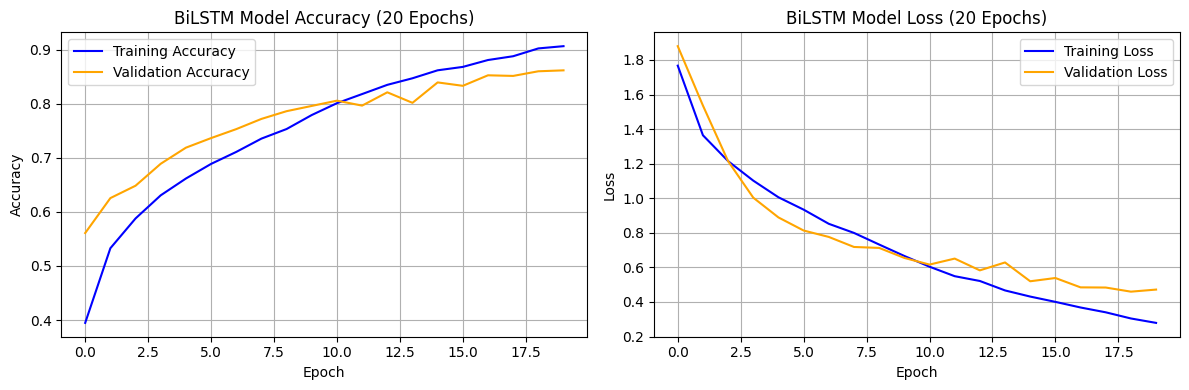

55/55 ━━━━━━━━━━━━━━━━━━━━ 20s 355ms/step


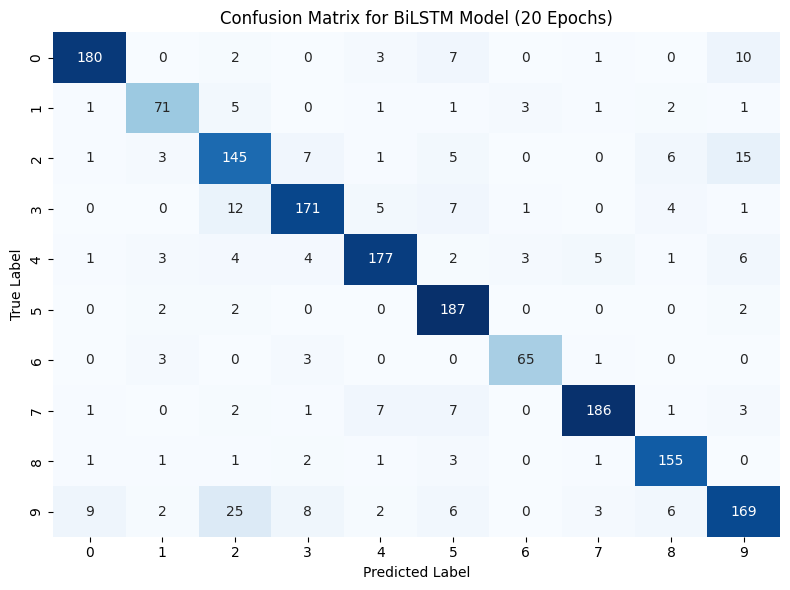

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       203
           1       0.84      0.83      0.83        86
           2       0.73      0.79      0.76       183
           3       0.87      0.85      0.86       201
           4       0.90      0.86      0.88       206
           5       0.83      0.97      0.89       193
           6       0.90      0.90      0.90        72
           7       0.94      0.89      0.92       208
           8       0.89      0.94      0.91       165
           9       0.82      0.73      0.77       230

    accuracy                           0.86      1747
   macro avg       0.86      0.87      0.86      1747
weighted avg       0.86      0.86      0.86      1747



In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Bidirectional, LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

# Define the BiLSTM model
model_bilstm = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    Bidirectional(LSTM(256, return_sequences=True)),
    Bidirectional(LSTM(128)),
    Dropout(0.2),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compile the model
model_bilstm.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Train the model
history = model_bilstm.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping, lr_scheduler])

# Save the trained model
model_bilstm.save('bilstm20.h5')

# Section 1: Plot Training and Validation Accuracy/Loss Graphs
plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('BiLSTM Model Accuracy (20 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('BiLSTM Model Loss (20 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('bilstm_accuracy_loss_20_epochs_imp.png')  # Save accuracy/loss plot
plt.show()

# Section 2: Confusion Matrix
# Predict on test data
y_pred = model_bilstm.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot and save confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for BiLSTM Model (20 Epochs)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.savefig('bilstm_confusion_matrix_20_epochs.png')  # Save confusion matrix plot
plt.show()

# Classification report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))


In [14]:
import tensorflow as tf

model = tf.keras.models.load_model('D:/PROJECT11/backend/lstm_urbansound8k_model100.h5')
print("Model input shape:", model.input_shape)
model.summary()

Model input shape: (None, 173, 13)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        72,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,612 (318.80 KB)

 Trainable params: 81,610 (318.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.1998 - loss: 16.2078 - val_accuracy: 0.3560 - val_loss: 1.8810
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.3794 - loss: 1.7579 - val_accuracy: 0.4396 - val_loss: 1.6827
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.4363 - loss: 1.6146 - val_accuracy: 0.4808 - val_loss: 1.5190
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.5008 - loss: 1.4435 - val_accuracy: 0.5112 - val_loss: 1.4601
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.5416 - loss: 1.3614 - val_accuracy: 0.5844 - val_loss: 1.3054
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.5847 - loss: 1.2198 - val_accuracy: 0.5976 - val_loss: 1.2599
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.5993 - loss: 1.1355 - val_accuracy: 0.6199 - val_loss: 1.1507
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.6355 - loss: 1.0610 - val_acc

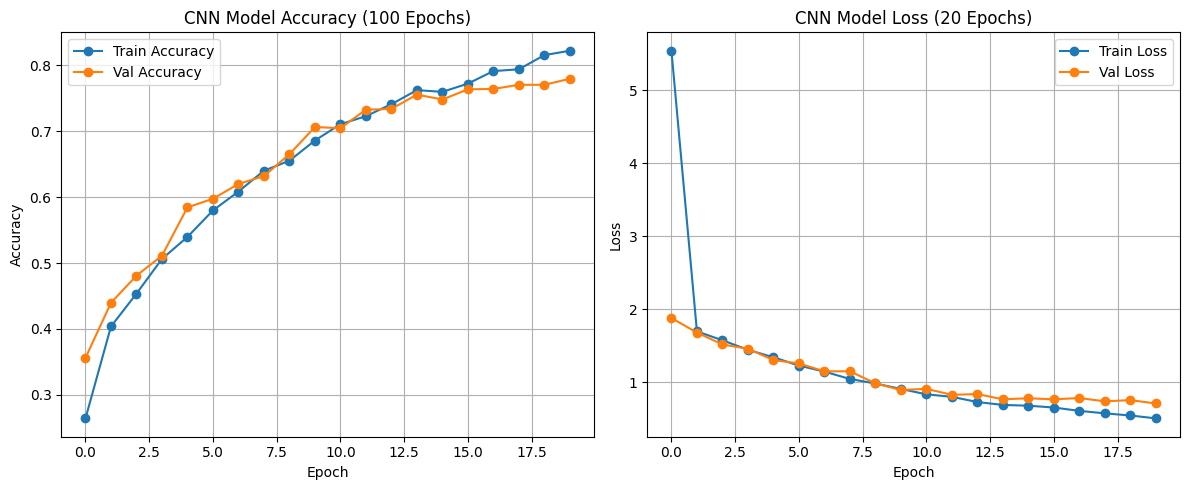

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, Reshape
from tensorflow.keras.optimizers import Adam

# Reshape input for CNN: (samples, time_steps, 13) → (samples, time_steps, 13, 1)
X_train_cnn = X_train.reshape(-1, X_train.shape[1], X_train.shape[2], 1)
X_test_cnn = X_test.reshape(-1, X_test.shape[1], X_test.shape[2], 1)

# Define CNN model
model_cnn = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2], 1)),  # (time_steps, 13, 1)
    
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Compile model
model_cnn.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model_cnn.fit(X_train_cnn, y_train, epochs=20, batch_size=32, validation_data=(X_test_cnn, y_test))

# Save the model
model_cnn.save('cnn_urbansound8k_model20.h5')

# Plot training results
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('CNN Model Accuracy (100 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('CNN Model Loss (20 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('cnn_accuracy_loss_plots_20_epochs.png')
plt.show()


Epoch 1/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2370 - loss: 2.3244

219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.2374 - loss: 2.3229 - val_accuracy: 0.1162 - val_loss: 2.2867
Epoch 2/40
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4578 - loss: 1.5514

219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.4579 - loss: 1.5509 - val_accuracy: 0.2290 - val_loss: 2.1161
Epoch 3/40
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5280 - loss: 1.3617

219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5283 - loss: 1.3612 - val_accuracy: 0.4906 - val_loss: 1.4862
Epoch 4/40
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5795 - loss: 1.2378

219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.5796 - loss: 1.2374 - val_accuracy: 0.6205 - val_loss: 1.1589
Epoch 5/40
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6162 - loss: 1.1308

219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.6162 - loss: 1.1305 - val_accuracy: 0.6457 - val_loss: 1.0928
Epoch 6/40
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6561 - loss: 1.0329

219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.6561 - loss: 1.0329 - val_accuracy: 0.6623 - val_loss: 1.0255
Epoch 7/40
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6727 - loss: 0.9502

219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.6727 - loss: 0.9502 - val_accuracy: 0.6732 - val_loss: 0.9660
Epoch 8/40
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6882 - loss: 0.8926

219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.6882 - loss: 0.8927 - val_accuracy: 0.7086 - val_loss: 0.8453
Epoch 9/40
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7204 - loss: 0.8360

219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.7204 - loss: 0.8361 - val_accuracy: 0.7252 - val_loss: 0.8029
Epoch 10/40
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7263 - loss: 0.8038

219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.7263 - loss: 0.8037 - val_accuracy: 0.7338 - val_loss: 0.7715
Epoch 11/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.7305 - loss: 0.7848 - val_accuracy: 0.7293 - val_loss: 0.7975
Epoch 12/40
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7467 - loss: 0.7240

219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.7467 - loss: 0.7241 - val_accuracy: 0.7567 - val_loss: 0.7327
Epoch 13/40
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7431 - loss: 0.7112

219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.7432 - loss: 0.7112 - val_accuracy: 0.7665 - val_loss: 0.7032
Epoch 14/40
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7617 - loss: 0.7103

219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.7618 - loss: 0.7099 - val_accuracy: 0.7779 - val_loss: 0.6731
Epoch 15/40
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7792 - loss: 0.6508

219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.7793 - loss: 0.6506 - val_accuracy: 0.7836 - val_loss: 0.6376
Epoch 16/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.7937 - loss: 0.6161 - val_accuracy: 0.7899 - val_loss: 0.6450
Epoch 17/40
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8011 - loss: 0.5879

219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.8010 - loss: 0.5881 - val_accuracy: 0.7956 - val_loss: 0.5973
Epoch 18/40
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7929 - loss: 0.5954

219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.7930 - loss: 0.5951 - val_accuracy: 0.7968 - val_loss: 0.5951
Epoch 19/40
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7990 - loss: 0.5680

219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.7990 - loss: 0.5678 - val_accuracy: 0.8094 - val_loss: 0.5570
Epoch 20/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.8183 - loss: 0.5078 - val_accuracy: 0.7916 - val_loss: 0.5924
Epoch 21/40
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8276 - loss: 0.5100

219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.8275 - loss: 0.5100 - val_accuracy: 0.8134 - val_loss: 0.5494
Epoch 22/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.8352 - loss: 0.4885 - val_accuracy: 0.8094 - val_loss: 0.5568
Epoch 23/40
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8398 - loss: 0.4826

219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.8398 - loss: 0.4827 - val_accuracy: 0.8300 - val_loss: 0.4907
Epoch 24/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.8375 - loss: 0.4690 - val_accuracy: 0.8248 - val_loss: 0.5051
Epoch 25/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.8470 - loss: 0.4416 - val_accuracy: 0.8271 - val_loss: 0.5103
Epoch 26/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.8461 - loss: 0.4435 - val_accuracy: 0.8306 - val_loss: 0.4971
Epoch 27/40
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8528 - loss: 0.4271

219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.8528 - loss: 0.4272 - val_accuracy: 0.8437 - val_loss: 0.4747
Epoch 28/40
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8449 - loss: 0.4288

219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.8450 - loss: 0.4289 - val_accuracy: 0.8517 - val_loss: 0.4497
Epoch 29/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.8570 - loss: 0.4052 - val_accuracy: 0.8460 - val_loss: 0.4890
Epoch 30/40
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8605 - loss: 0.3877

219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.8606 - loss: 0.3877 - val_accuracy: 0.8558 - val_loss: 0.4480
Epoch 31/40
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8728 - loss: 0.3689

219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.8727 - loss: 0.3691 - val_accuracy: 0.8678 - val_loss: 0.4290
Epoch 32/40
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8735 - loss: 0.3700

219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.8734 - loss: 0.3700 - val_accuracy: 0.8678 - val_loss: 0.4118
Epoch 33/40
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8803 - loss: 0.3560

219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.8803 - loss: 0.3560 - val_accuracy: 0.8758 - val_loss: 0.4109
Epoch 34/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.8797 - loss: 0.3437 - val_accuracy: 0.8466 - val_loss: 0.4761
Epoch 35/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.8862 - loss: 0.3358 - val_accuracy: 0.8678 - val_loss: 0.4110
Epoch 36/40
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8857 - loss: 0.3329

219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.8858 - loss: 0.3329 - val_accuracy: 0.8827 - val_loss: 0.3611
Epoch 37/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.8871 - loss: 0.3230 - val_accuracy: 0.8838 - val_loss: 0.3779
Epoch 38/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.8894 - loss: 0.3172 - val_accuracy: 0.8695 - val_loss: 0.4081
Epoch 39/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.8927 - loss: 0.3182 - val_accuracy: 0.8735 - val_loss: 0.4141
Epoch 40/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9008 - loss: 0.3110 - val_accuracy: 0.8746 - val_loss: 0.4213


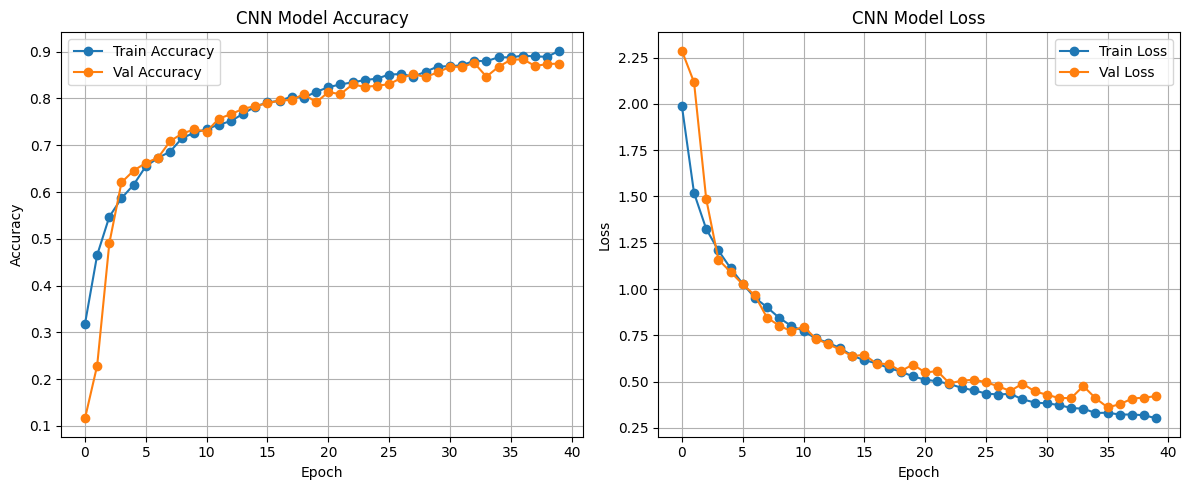

In [ ]:
#improved cnn

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Normalize input data
X_train = X_train / np.max(X_train)
X_test = X_test / np.max(X_test)

# Reshape input for CNN
X_train_cnn = X_train.reshape(-1, X_train.shape[1], X_train.shape[2], 1)
X_test_cnn = X_test.reshape(-1, X_test.shape[1], X_test.shape[2], 1)

# Build improved CNN model
model_cnn = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2], 1)),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

# Compile model
model_cnn.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_cnn_model.h5', save_best_only=True)

# Train model
history = model_cnn.fit(
    X_train_cnn, y_train,
    epochs=40,
    batch_size=32,
    validation_data=(X_test_cnn, y_test),
    callbacks=[early_stop, checkpoint]
)

# Save final model
model_cnn.save('cnn.h5')



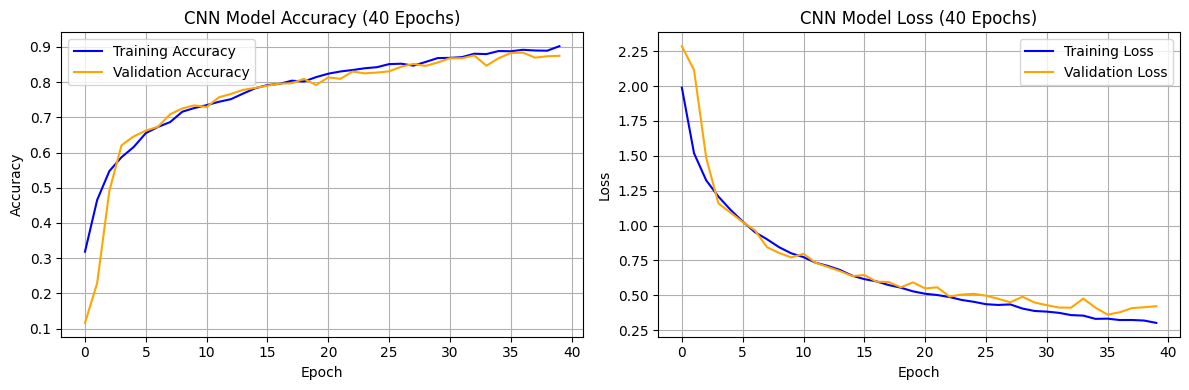

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


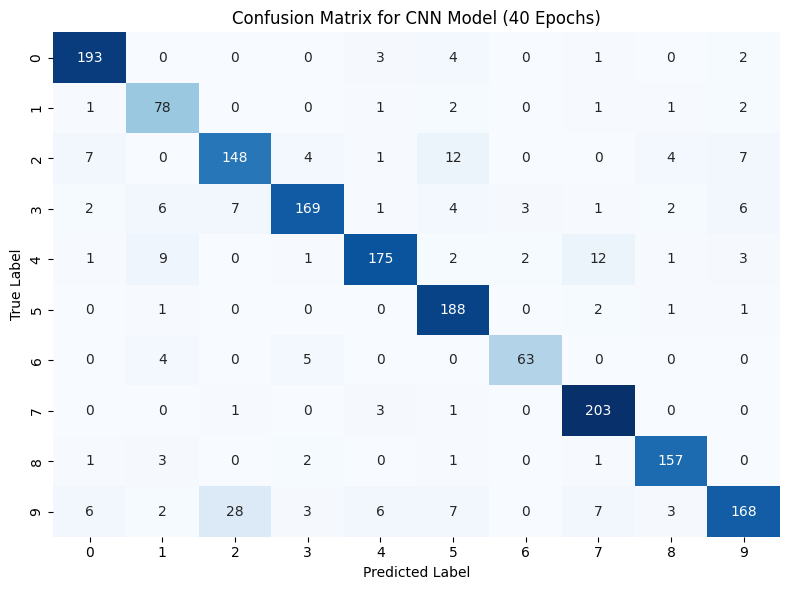

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       203
           1       0.76      0.91      0.83        86
           2       0.80      0.81      0.81       183
           3       0.92      0.84      0.88       201
           4       0.92      0.85      0.88       206
           5       0.85      0.97      0.91       193
           6       0.93      0.88      0.90        72
           7       0.89      0.98      0.93       208
           8       0.93      0.95      0.94       165
           9       0.89      0.73      0.80       230

    accuracy                           0.88      1747
   macro avg       0.88      0.89      0.88      1747
weighted avg       0.89      0.88      0.88      1747



In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# ====== Accuracy & Loss Plot ======
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('CNN Model Accuracy (40 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('CNN Model Loss (40 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('cnn_accuracy_loss_40_epochs.png')  # Save accuracy/loss plot
plt.show()

# ====== Confusion Matrix ======
# Predict on test data
y_pred = model_cnn.predict(X_test_cnn)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for CNN Model (40 Epochs)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.savefig('cnn_confusion_matrix_40_epochs.png')  # Save confusion matrix
plt.show()

# ====== Classification Report ======
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))


In [20]:
import tensorflow as tf

model = tf.keras.models.load_model('cnn_urbansound8k_model20.h5')
print("Model input shape:", model.input_shape)
model.summary()

Model input shape: (None, 173, 13, 1)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 173, 13, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 86, 6, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 86, 6, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 86, 6, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 43, 3, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 43, 3, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 8256)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     1,056,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,077,004 (4.11 MB)

 Trainable params: 1,077,002 (4.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

d:\PROJECT11\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.1932 - loss: 2.2797 - val_accuracy: 0.5089 - val_loss: 1.4943
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.4244 - loss: 1.6327 - val_accuracy: 0.6062 - val_loss: 1.2327
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - accuracy: 0.5202 - loss: 1.4009 - val_accuracy: 0.6325 - val_loss: 1.1162
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.5604 - loss: 1.2668 - val_accuracy: 0.6789 - val_loss: 1.0107
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - accuracy: 0.5920 - loss: 1.1838 - val_accuracy: 0.6737 - val_loss: 0.9600
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 17s 77ms/step - accuracy: 0.6326 - loss: 1.0825 - val_accuracy: 0.6972 - val_loss: 0.9073
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - accuracy: 0.6524 - loss: 1.0464 - val_accuracy: 0.7327 - val_loss: 0.8456
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 16s 75ms/step - accuracy: 0.6744 - loss: 0.9752 - 

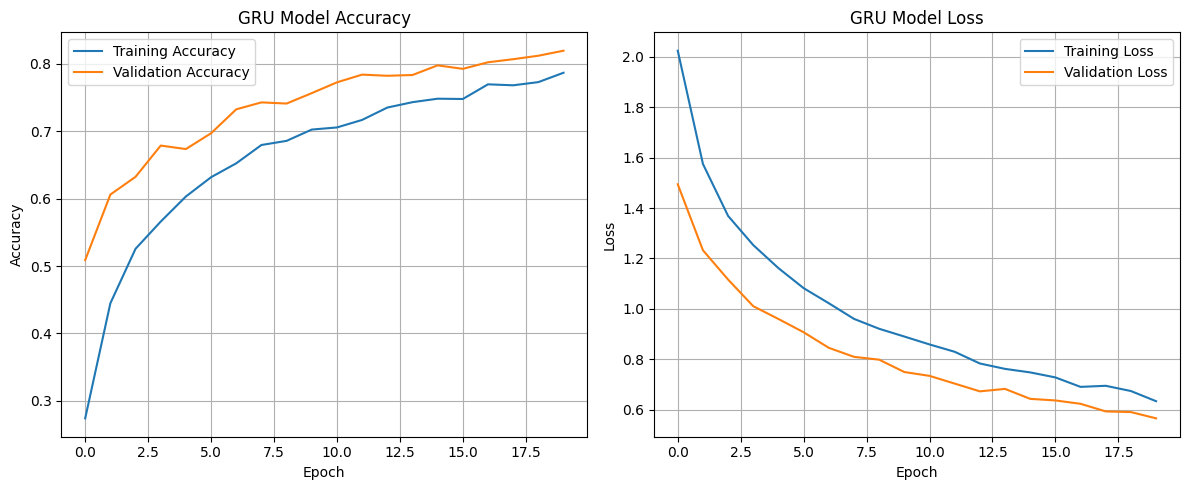

In [8]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense

# Define and compile the GRU model
model_gru = Sequential([
    GRU(128, input_shape=(max_len, 13)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])
model_gru.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model and store the history
history = model_gru.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Save the trained model
model_gru.save('gru20.h5')

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('GRU Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('GRU Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('gru20epoch.png')


In [20]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense

# Define and compile the GRU model
model_gru = Sequential([
    GRU(512, input_shape=(max_len, 13)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])
model_gru.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model and store the history
history = model_gru.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Save the trained model
model_gru.save('gru_imprvd.h5')

# Plot accuracy and loss
plt.figure(figsize=(12, 5))


Epoch 1/20


d:\PROJECT11\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 46s 205ms/step - accuracy: 0.3169 - loss: 1.9461 - val_accuracy: 0.4430 - val_loss: 1.5942
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 64s 291ms/step - accuracy: 0.4219 - loss: 1.5679 - val_accuracy: 0.4751 - val_loss: 1.4817
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 63s 289ms/step - accuracy: 0.4693 - loss: 1.4770 - val_accuracy: 0.5135 - val_loss: 1.3561
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 60s 273ms/step - accuracy: 0.5332 - loss: 1.3203 - val_accuracy: 0.5879 - val_loss: 1.1820
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 63s 290ms/step - accuracy: 0.5800 - loss: 1.1768 - val_accuracy: 0.6440 - val_loss: 1.0383
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 65s 296ms/step - accuracy: 0.6495 - loss: 1.0114 - val_accuracy: 0.6669 - val_loss: 0.9306
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 65s 296ms/step - accuracy: 0.6815 - loss: 0.9032 - val_accuracy: 0.7086 - val_loss: 0.8307
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 65s 297ms/step - accuracy: 0.7175 - loss: 0.7892 - val

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step


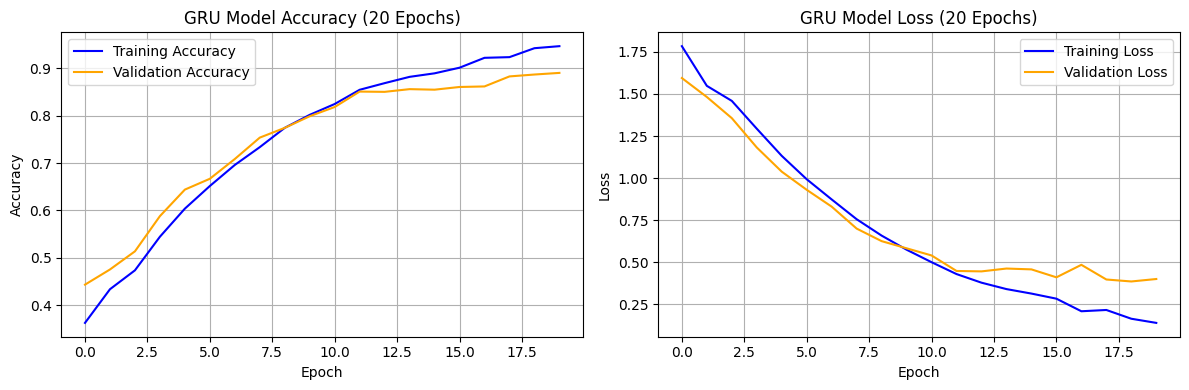

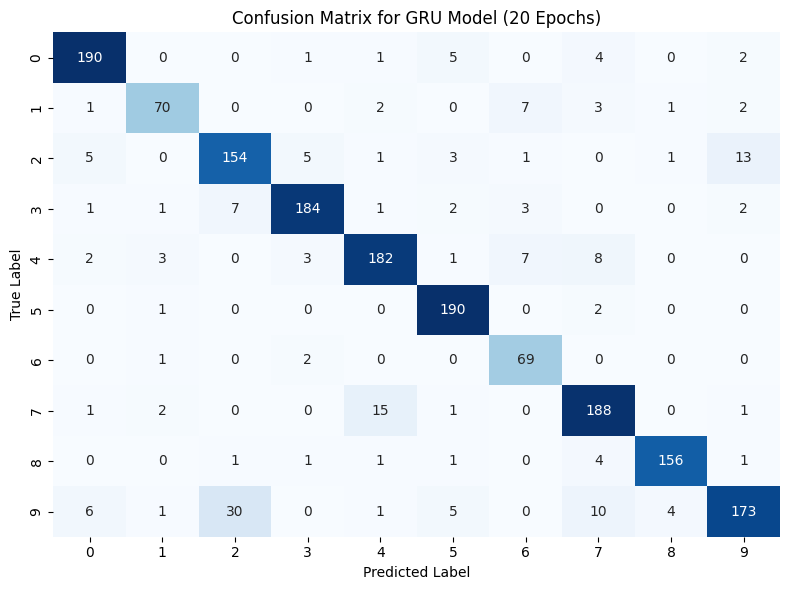

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       203
           1       0.89      0.81      0.85        86
           2       0.80      0.84      0.82       183
           3       0.94      0.92      0.93       201
           4       0.89      0.88      0.89       206
           5       0.91      0.98      0.95       193
           6       0.79      0.96      0.87        72
           7       0.86      0.90      0.88       208
           8       0.96      0.95      0.95       165
           9       0.89      0.75      0.82       230

    accuracy                           0.89      1747
   macro avg       0.89      0.89      0.89      1747
weighted avg       0.89      0.89      0.89      1747



In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model

# Load model and predict
model_gru = load_model('gru_imprvd.h5')
y_pred = model_gru.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# ====== Accuracy & Loss Plots ======
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('GRU Model Accuracy (20 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('GRU Model Loss (20 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('gru_imprvd_20epochs.png')
plt.show()

# ====== Confusion Matrix ======
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for GRU Model (20 Epochs)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.savefig('gru_confusion_matrix_20epochs.png')
plt.show()

# ====== Classification Report ======
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))


Epoch 1/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 42s 358ms/step - accuracy: 0.1588 - loss: 2.4552 - val_accuracy: 0.3389 - val_loss: 2.0775 - learning_rate: 1.0000e-04
Epoch 2/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 45s 408ms/step - accuracy: 0.2769 - loss: 2.0333 - val_accuracy: 0.3927 - val_loss: 1.8682 - learning_rate: 1.0000e-04
Epoch 3/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 33s 300ms/step - accuracy: 0.3201 - loss: 1.8866 - val_accuracy: 0.4333 - val_loss: 1.7002 - learning_rate: 1.0000e-04
Epoch 4/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 33s 301ms/step - accuracy: 0.3431 - loss: 1.8040 - val_accuracy: 0.4516 - val_loss: 1.6034 - learning_rate: 1.0000e-04
Epoch 5/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 33s 301ms/step - accuracy: 0.3583 - loss: 1.7678 - val_accuracy: 0.4682 - val_loss: 1.5497 - learning_rate: 1.0000e-04
Epoch 6/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 32s 295ms/step - accuracy: 0.3751 - loss: 1.7419 - val_accuracy: 0.4688 - val_loss: 1.5191 - learning_rate: 1.0000e-04
Epoch 7/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 33s 30

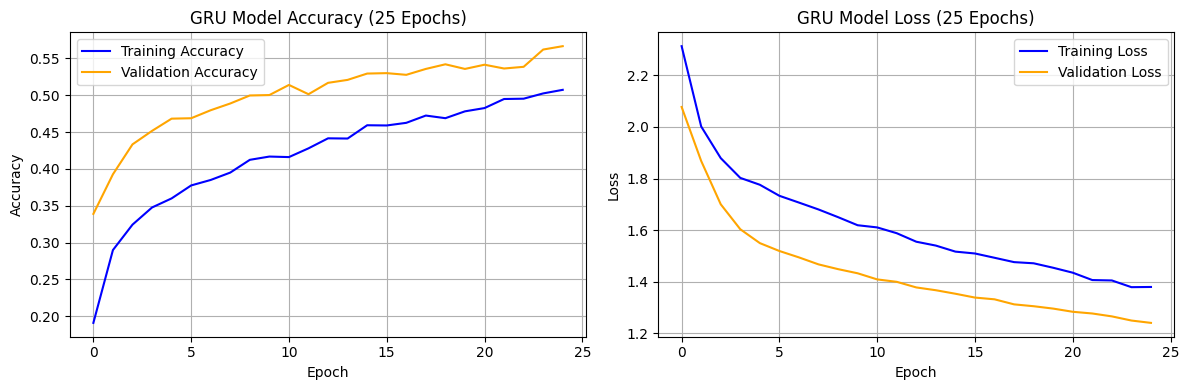

55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step


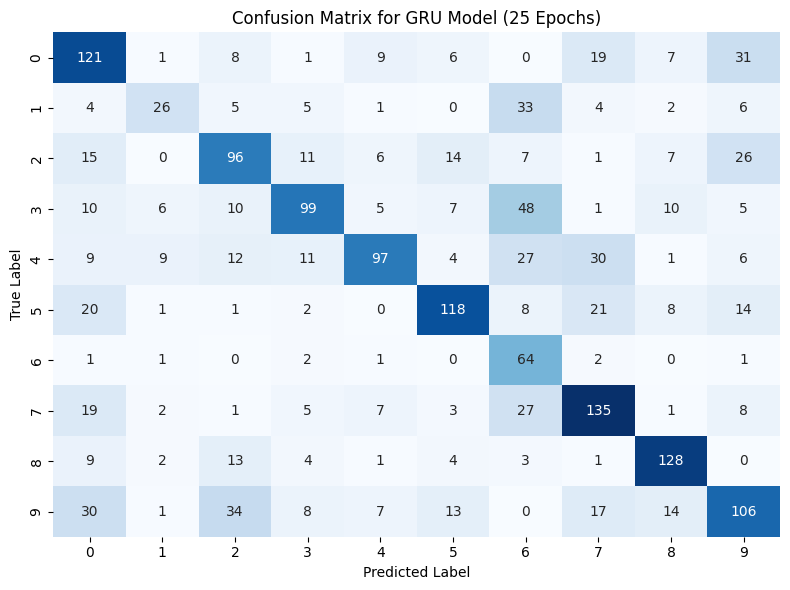

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.60      0.55       203
           1       0.53      0.30      0.39        86
           2       0.53      0.52      0.53       183
           3       0.67      0.49      0.57       201
           4       0.72      0.47      0.57       206
           5       0.70      0.61      0.65       193
           6       0.29      0.89      0.44        72
           7       0.58      0.65      0.62       208
           8       0.72      0.78      0.75       165
           9       0.52      0.46      0.49       230

    accuracy                           0.57      1747
   macro avg       0.58      0.58      0.55      1747
weighted avg       0.60      0.57      0.57      1747



In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, GRU, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

# Define the GRU model
model_gru = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    GRU(128, return_sequences=True),
    GRU(64),
    Dropout(0.3),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Compile the model
model_gru.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Train the model
history = model_gru.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping, lr_scheduler])

# Save the trained model
model_gru.save('gru25.h5')

# Section 1: Plot Training and Validation Accuracy/Loss Graphs
plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('GRU Model Accuracy (25 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('GRU Model Loss (25 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('gru_accuracy_loss_25_epochs.png')
plt.show()

# Section 2: Confusion Matrix
# Predict on test data
y_pred = model_gru.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot and save confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for GRU Model (25 Epochs)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.savefig('gru_confusion_matrix_25_epochs.png')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))
